# Поставување кралици на шаховска табла
Распоредете N кралици на шаховска табла така што кралиците нема да се напаѓаат.

In [1]:
from collections import deque
import os

In [2]:
def is_valid(new_state, new_queen_i, new_queen_j):
    vertical_check = new_queen_j not in new_state
    if not vertical_check:
        return False
    main_diagonal = new_queen_i - new_queen_j
    anti_diagonal = new_queen_i + new_queen_j
    other_queens = new_state[:N - new_state.count(None)]
    for other_queen_i, other_queen_j in enumerate(other_queens):
        if other_queen_i - other_queen_j == main_diagonal:
            return False
        if other_queen_i + other_queen_j == anti_diagonal:
            return False
    return True

In [3]:
def expand_state(state):
    new_states = []
    available_places = state.count(None)
    if not available_places:
        return []
    new_queen_i = N - available_places
    for new_queen_j in range(N):
        if is_valid(state, new_queen_i, new_queen_j):
            new_state = list(state)
            new_state[new_queen_i] = new_queen_j
            new_states.append(tuple(new_state))
    return new_states

In [4]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state.count(None) == 0:
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)
    return

In [15]:
def visualise_queens(queens):
    import numpy as np
    import skimage
    from skimage import io
    import matplotlib.pyplot as plt
    plt.axis('off')
    if not queens:
        print('Не постои реше.astype(np.uint8)ние за N =', N)
        return
    border_color = (0, 0, 0, 1)
    queen = skimage.img_as_float(io.imread('Resources/Photos/queen.png'))
    table = np.zeros((queen.shape[0] * N, queen.shape[1] * N, queen.shape[2]))
    margin = queen.shape[0] // 20
    for i, j in enumerate(queens):
        table[i*queen.shape[0]:(i+1)*queen.shape[0], j*queen.shape[1]:(j+1)*queen.shape[1]] = queen
    for index in range(1, N):
        table[index * queen.shape[0] - margin: index * queen.shape[0] + margin] = border_color
        table[:, index * queen.shape[1] - margin: index * queen.shape[1] + margin] = border_color
    io.imshow(255*table.astype(np.uint8))
    return

In [16]:
N = 8
initial_state = (None,) * N
queens = search(initial_state, alg='dfs')
queens

(7, 3, 0, 2, 5, 1, 6, 4)

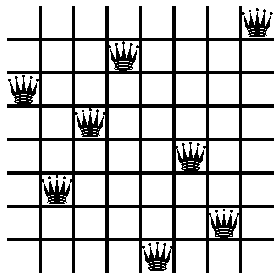

In [17]:
visualise_queens(queens)

## Користејќи ја шаховската фигура коњ, најдете ја најкратката патека од едно до друго поле на шаховската табла

In [1]:
from collections import deque

In [48]:
def expand_state(state):
    moves = [(1, 2), (2, 1), (2, -1), (1, -2), (-1, -2), (-2, -1), (-2, 1), (-1, 2)]
    new_states = []
    for move in moves:
        new_state = tuple(map(sum, zip(state, move)))
        if (0 <= new_state[0] < 8) and (0 <= new_state[1] < 8):
            new_states.append(new_state)
    return new_states

In [49]:
def search_path(initial_state, goal_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state:
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [50]:
def visualise_knights(queens):
    import numpy as np
    import skimage
    from skimage import io

    if not queens:
        print('Не постои реше.astype(np.uint8)ние за N =', N)
        return
    border_color = (0, 0, 0, 1)
    queen = skimage.img_as_float(io.imread('Resources/Photos/knight.png'))
    table = np.zeros((queen.shape[0] * N, queen.shape[1] * N, queen.shape[2]))
    margin = queen.shape[0] // 20
    for i, j in queens:
        table[i*queen.shape[0]:(i+1)*queen.shape[0], j*queen.shape[1]:(j+1)*queen.shape[1]] = queen
    for index in range(1, N):
        table[index * queen.shape[0] - margin: index * queen.shape[0] + margin] = border_color
        table[:, index * queen.shape[1] - margin: index * queen.shape[1] + margin] = border_color
    io.imshow(255*table.astype(np.uint8))
    return

In [57]:
N = 8
initial_state = (1, 7)
goal_state = (7, 7)
knights = search_path(initial_state, goal_state)
knights

[(1, 7), (3, 6), (5, 7), (6, 5), (7, 7)]

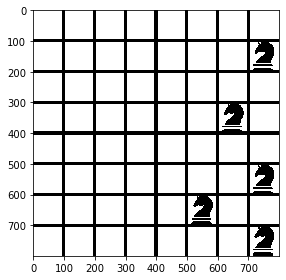

In [58]:
visualise_knights(knights)

# River

In [123]:
from collections import deque
import itertools

In [168]:
def possible_trips(available_passengers):
    trips = []
    for seat in range(seats+1):
        for possible_trip in itertools.combinations(available_passengers, seat):
            if boat_conditions(possible_trip):
                trips.append(possible_trip)
    return trips

In [178]:
def boat_conditions(trip):
    if not any([passenger in sailors for passenger in trip]):
        return False
    if len(trip) > 1 and weight[trip[0]]+weight[trip[1]] > 100:
        return False
    return True

In [179]:
def bank_conditions(left_bank, right_bank):
    # if 'Sin1' in left_bank and len(left_bank) == 1 or 'Sin1' in right_bank and len(right_bank) == 1:
    #    return False
    # if 'Sin2' in left_bank and len(left_bank) == 1 or 'Sin2' in right_bank and len(right_bank) == 1:
    #    return False
    return True

In [180]:
def expand_state(state):
    new_states = []
    boat, left_bank, right_bank = unpack_state(state)

    if boat == 'left':
        trips = possible_trips(left_bank)
    else:
        trips = possible_trips(right_bank)

    for trip in trips:
        if boat == 'left':
            new_left_bank = left_bank - set(trip)
            new_right_bank = right_bank | set(trip)
        else:
            new_left_bank = left_bank | set(trip)
            new_right_bank = right_bank - set(trip)

        if bank_conditions(new_left_bank, new_right_bank):
            new_states.append(pack_state(boat, new_left_bank))

    return new_states

In [181]:
def pack_state(boat_side, new_left_bank):
    temp = ["left" if (boat_side == "right") else "right"]
    for passenger in passengers:
        temp.append("left" if (passenger in new_left_bank) else "right")
    return tuple(temp)

In [182]:
def unpack_state(state):
    boat = state[0]
    left_bank = set([passengers[index] for index, side in enumerate(state[1:]) if side == 'left'])
    right_bank = set([passengers[index] for index, side in enumerate(state[1:]) if side == 'right'])
    return boat, left_bank, right_bank

In [183]:
def search_path(initial_state, goal_state):
    """
    Search function
    :param initial_state: initial state for search
    :param goal_state: desired state
    :return: search result as list of states
    """
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state:
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [184]:
def separated_print(iterable):
    """
    Desired print function.
    :param iterable: list to be printed
    :return: None
    """
    for element in iterable:
        print(element, end=' ')
    if not iterable:
        print('Empty', end='')

In [185]:

def visualise(path):
    """
    Function to visualise path returned from the search function
    :param path: path to be visualised
    :return: None
    """
    if not path:
        print('Search path did not find a solution')
        return
    for pair_of_states in zip(path, path[1:]):
        boat_old, left_old, right_old = unpack(pair_of_states[0])
        boat_new, left_new, right_new = unpack(pair_of_states[1])
        delimiter_space = ' ' * 55
        separated_print(left_old)
        print(delimiter_space, end='')
        separated_print(right_old)
        print()
        if boat_old == 'left':
            delimiter = ' ' * 5 + '>' * 15 + ' ' * 5
            separated_print(left_new)
            print(delimiter, end='')
            separated_print(left_old - left_new)
            print(delimiter, end='')
            separated_print(right_old)
            print()
        else:
            delimiter = ' ' * 5 + '<' * 15 + ' ' * 5
            separated_print(left_old)
            print(delimiter, end='')
            separated_print(right_old - right_new)
            print(delimiter, end='')
            separated_print(right_new)
            print()
        separated_print(left_new)
        print(delimiter_space, end='')
        separated_print(right_new)
        print()
        print()
        print()

In [186]:
weight = {'tato':90,'mama':80,"sin":60, 'kerka':40, 'torba':20}
passengers = ['tato', 'mama', 'sin', 'kerka', 'torba']
sailors = ['tato', 'mama', 'sin', 'kerka']
seats = 2
initial_state = ('left',) * (len(passengers)+1)
goal_state = ('right',) * (len(passengers)+1)
path = search_path(initial_state, goal_state)
visualise(path)

mama torba tato kerka sin                                                        Empty
mama torba tato      >>>>>>>>>>>>>>>     sin kerka      >>>>>>>>>>>>>>>     Empty
mama torba tato                                                        sin kerka 


mama torba tato                                                        sin kerka 
mama torba tato      <<<<<<<<<<<<<<<     sin      <<<<<<<<<<<<<<<     kerka 
mama sin torba tato                                                        kerka 


mama sin torba tato                                                        kerka 
mama sin torba      >>>>>>>>>>>>>>>     tato      >>>>>>>>>>>>>>>     kerka 
mama sin torba                                                        kerka tato 


mama sin torba                                                        kerka tato 
mama sin torba      <<<<<<<<<<<<<<<     kerka      <<<<<<<<<<<<<<<     tato 
mama sin torba kerka                                                        tato 


mama sin torba ker